In [1]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import hvplot.pandas

In [2]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [4]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file

# Normalize the data using the StandardScaler() module
# First, we fit the StandardScaler on our data to compute the mean and standard deviation
# Then, we transform (scale) our data by subtracting the mean and dividing by the standard deviation
scaler = StandardScaler()
scaled_data = scaler.fit_transform(market_data_df)

# Create a DataFrame with the scaled data
scaled_data_df = pd.DataFrame(scaled_data, columns=market_data_df.columns, index=market_data_df.index)

# Display the first five rows of the scaled DataFrame
print(scaled_data_df.head())

              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610   

In [5]:
# Create a DataFrame with the scaled data
scaled_data_df = pd.DataFrame(scaled_data, columns=market_data_df.columns, index=market_data_df.index)

# Copy the crypto names from the original data


# Set the coinid column as index


# Display sample data
# Display sample data to confirm 'coin_id' is set as the index, which represents the crypto names
print(scaled_data_df.head())

              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610   

### Find the Best Value for k Using the Original Scaled DataFrame.

In [6]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = list(range(1, 12))

# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list

for k in k_values:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    model = KMeans(n_clusters=k, random_state=42)
    
    # 2. Fit the model to the data using the scaled DataFrame
    model.fit(scaled_data_df)
    
    # 3. Append the model.inertia_ to the inertia list
    inertia_values.append(model.inertia_)


# Create a dictionary with the data to plot the Elbow curve

elbow_data = {
    'k': k_values,
    'inertia': inertia_values
}


# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
print(elbow_df)

/Users/mattobrien/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mattobrien/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mattobrien/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


     k     inertia
0    1  287.000000
1    2  195.820218
2    3  123.190482
3    4   79.022435
4    5   65.302379
5    6   54.739922
6    7   43.481606
7    8   37.517032
8    9   32.591891
9   10   28.222899
10  11   24.116198


/Users/mattobrien/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mattobrien/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mattobrien/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mattobrien/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureW

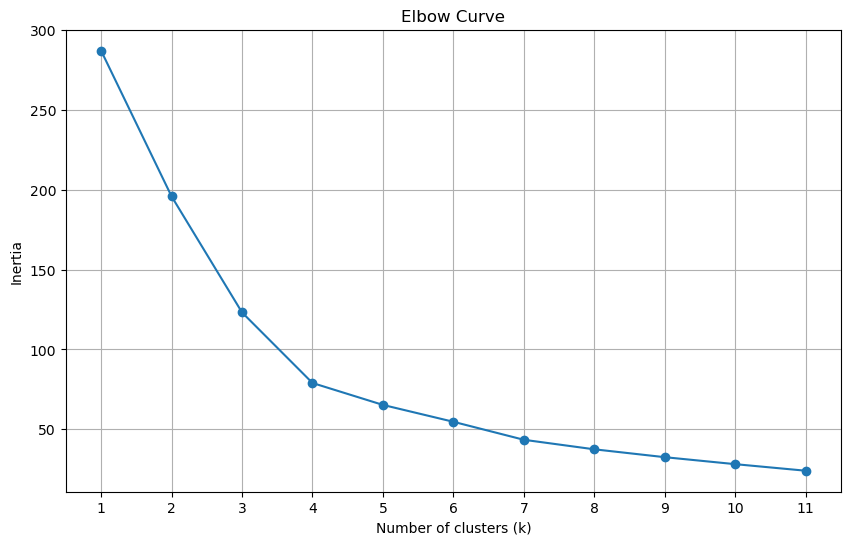

In [7]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o')
plt.title('Elbow Curve')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()

#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** 5

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [8]:
# Initialize the K-Means model using the best value for k


In [9]:
# Fit the K-Means model using the scaled data
# Assuming the best value for k determined from the elbow curve is 4
best_k = 5

# Initialize the K-Means model with the best value for k
kmeans_model = KMeans(n_clusters=best_k, random_state=42)

In [10]:
# Predict the clusters to group the cryptocurrencies using the scaled data
kmeans_model.fit(scaled_data_df)

# View the resulting array of cluster values.
# View the resulting array of cluster values
cluster_labels = kmeans_model.labels_

# Display the first 10 cluster labels to see a sample of the assignments
print("First 10 cluster labels assigned to the data points:", cluster_labels[:10])

First 10 cluster labels assigned to the data points: [0 2 0 0 2 2 2 2 0 0]


/Users/mattobrien/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [11]:
# Create a copy of the DataFrame
# Create a copy of the original DataFrame
market_data_with_clusters = market_data_df.copy()



In [12]:
# Add a new column to the DataFrame with the predicted clusters
market_data_with_clusters['Cluster'] = cluster_labels

# Display sample data
print(market_data_with_clusters.head())

              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                           1.08388                     7.60278   
ethereum                          0.22392                    10.38134   
tether                           -0.21173                     0.04935   
ripple                           -0.37819                    -0.60926   
bitcoin-cash                      2.90585                    17.09717   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                           6.57509                      7.67258   
ethereum                          4.80849                      0.13169   
tether                            0.00640                     -0.04237   
ripple                            2.24984                      0.23455   
bitcoin-cash                     14.75334   

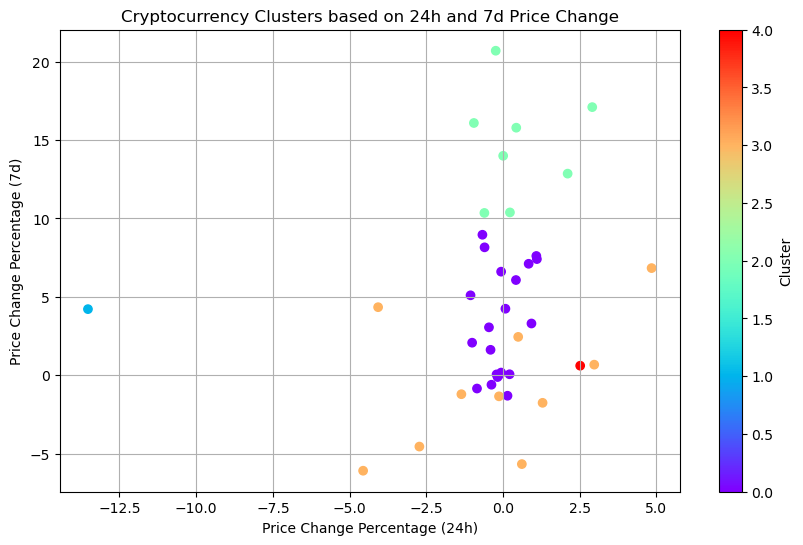

In [13]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(market_data_with_clusters['price_change_percentage_24h'], 
            market_data_with_clusters['price_change_percentage_7d'], 
            c=market_data_with_clusters['Cluster'], 
            cmap='rainbow')

plt.title('Cryptocurrency Clusters based on 24h and 7d Price Change')
plt.xlabel('Price Change Percentage (24h)')
plt.ylabel('Price Change Percentage (7d)')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

### Optimize Clusters with Principal Component Analysis.

In [14]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [15]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
pca_data = pca.fit_transform(scaled_data_df)
pca_data_df = pd.DataFrame(data=pca_data, columns=['PCA1', 'PCA2', 'PCA3'], index=scaled_data_df.index)

# View the first five rows of the DataFrame. 
print(pca_data_df.head())

                  PCA1      PCA2      PCA3
coin_id                                   
bitcoin      -0.600667  0.842760  0.461595
ethereum     -0.458261  0.458466  0.952877
tether       -0.433070 -0.168126 -0.641752
ripple       -0.471835 -0.222660 -0.479053
bitcoin-cash -1.157800  2.041209  1.859715


In [16]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
# Retrieve the explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Display the explained variance ratio
print("Explained Variance Ratio for each Principal Component:", explained_variance_ratio)

# Calculate the total explained variance by summing the ratios
total_explained_variance = sum(explained_variance_ratio)

# Display the total explained variance
print("Total Explained Variance by the three Principal Components:", total_explained_variance)

Explained Variance Ratio for each Principal Component: [0.3719856  0.34700813 0.17603793]
Total Explained Variance by the three Principal Components: 0.8950316570309842


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 

The total explained variance of the three principal components is approximately 89.5%. This means that the first three principal components together capture about 89.5% of the total variance in the dataset. 

In [17]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you

# Creating a DataFrame with the PCA data


# Copy the crypto names from the original data


# Set the coinid column as index


# Display sample data
print(pca_data_df.head())

                  PCA1      PCA2      PCA3
coin_id                                   
bitcoin      -0.600667  0.842760  0.461595
ethereum     -0.458261  0.458466  0.952877
tether       -0.433070 -0.168126 -0.641752
ripple       -0.471835 -0.222660 -0.479053
bitcoin-cash -1.157800  2.041209  1.859715


### Find the Best Value for k Using the PCA Data

In [18]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = list(range(1, 12))

# Create an empty list to store the inertia values

inertia_values_pca = []
# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list

for k in k_values:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans_pca = KMeans(n_clusters=k, random_state=42)
    
    # 2. Fit the model to the data using PCA DataFrame
    kmeans_pca.fit(pca_data_df)
    
    # 3. Append the model.inertia_ to the inertia list
    inertia_values_pca.append(kmeans_pca.inertia_)
# Create a dictionary with the data to plot the Elbow curve

elbow_data_pca = {
    'k': k_values,
    'inertia': inertia_values_pca
}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df_pca = pd.DataFrame(elbow_data_pca)

# Display the DataFrame
print(elbow_df_pca)

     k     inertia
0    1  256.874086
1    2  165.901994
2    3   93.774626
3    4   49.665497
4    5   37.839466
5    6   30.777746
6    7   21.134056
7    8   17.091637
8    9   13.681140
9   10   10.630648
10  11    8.128620


/Users/mattobrien/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mattobrien/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mattobrien/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mattobrien/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureW

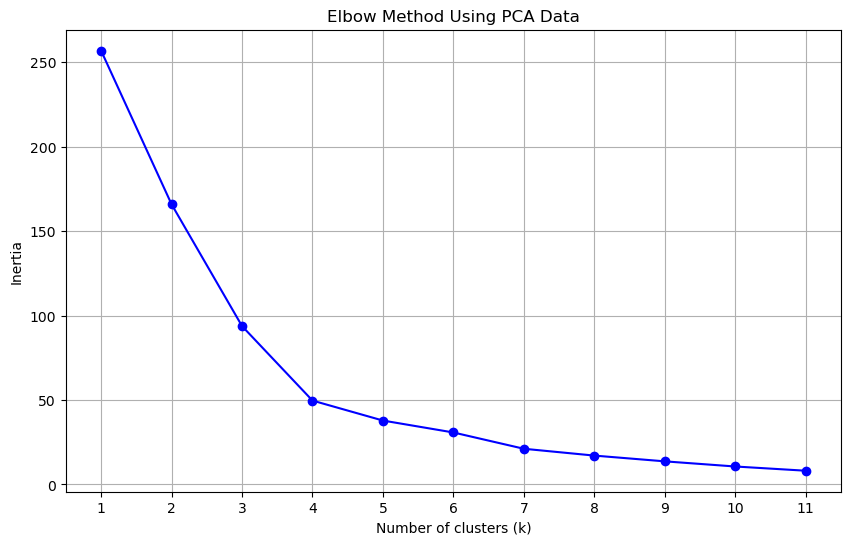

In [19]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.

plt.figure(figsize=(10, 6))
plt.plot(elbow_df_pca['k'], elbow_df_pca['inertia'], marker='o', linestyle='-', color='b')
plt.title('Elbow Method Using PCA Data')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** Yes

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [20]:
# Initialize the K-Means model using the best value for k
best_k_pca = 4

In [21]:
# Fit the K-Means model using the PCA data
kmeans_pca = KMeans(n_clusters=best_k_pca, random_state=42)


In [22]:
# Predict the clusters to group the cryptocurrencies using the PCA data
pca_clusters = kmeans_pca.fit_predict(pca_data_df)

# Print the resulting array of cluster values.
print("Cluster assignments:", pca_clusters)

Cluster assignments: [0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


/Users/mattobrien/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [23]:
# Create a copy of the DataFrame with the PCA data
pca_data_with_clusters_df = pca_data_df.copy()


# Add a new column to the DataFrame with the predicted clusters
pca_data_with_clusters_df['Cluster'] = pca_clusters


# Display sample data
print(pca_data_with_clusters_df.head())


                  PCA1      PCA2      PCA3  Cluster
coin_id                                            
bitcoin      -0.600667  0.842760  0.461595        0
ethereum     -0.458261  0.458466  0.952877        0
tether       -0.433070 -0.168126 -0.641752        2
ripple       -0.471835 -0.222660 -0.479053        2
bitcoin-cash -1.157800  2.041209  1.859715        0


In [25]:
# Create a scatter plot by setting `x="PCA1"` and `y="PCA2"`. 
scatter_plot = pca_data_with_clusters_df.hvplot.scatter(x='PCA1', y='PCA2', by='Cluster', colormap='viridis', width=600, height=400, title="Cryptocurrency Clusters based on PCA")
# Display the plot
scatter_plot

:NdOverlay   [Cluster]
   :Scatter   [PCA1]   (PCA2)

### Determine the Weights of Each Feature on each Principal Component

In [26]:
# Use the columns from the original scaled DataFrame as the index.
# Get the PCA components (loadings) of each feature
pca_components = pca.components_

# Create a DataFrame with the PCA components and use the columns from the original scaled DataFrame as the index
pca_weights_df = pd.DataFrame(data=pca_components, columns=scaled_data_df.columns, index=[f'PCA{i+1}' for i in range(pca_components.shape[0])])

# Display the DataFrame to see the weights of each feature on each principal component
print(pca_weights_df)

      price_change_percentage_24h  price_change_percentage_7d  \
PCA1                    -0.416728                   -0.102432   
PCA2                     0.358162                    0.227432   
PCA3                    -0.218795                    0.787670   

      price_change_percentage_14d  price_change_percentage_30d  \
PCA1                    -0.009162                     0.191523   
PCA2                     0.540415                     0.562182   
PCA3                     0.349534                    -0.181744   

      price_change_percentage_60d  price_change_percentage_200d  \
PCA1                     0.320365                      0.594468   
PCA2                     0.434040                      0.027735   
PCA3                    -0.361377                      0.039733   

      price_change_percentage_1y  
PCA1                    0.568379  
PCA2                   -0.150789  
PCA3                    0.210541  


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** 
PCA1:
Strongest Positive Influence: price_change_percentage_1y (0.568379) and price_change_percentage_200d (0.594468) both have strong positive influences on PCA1, indicating that longer-term price changes contribute significantly to this component.

Strongest Negative Influence: price_change_percentage_24h (-0.416728) has the strongest negative influence on PCA1, suggesting that very recent price changes move in the opposite direction to longer-term changes in this component.

PCA2:

Strongest Positive Influence: price_change_percentage_30d (0.562182) and price_change_percentage_14d (0.540415) show strong positive influences, highlighting the importance of medium-term price changes in this component.

Strongest Negative Influence: price_change_percentage_1y (-0.150789) has a negative influence, though it is relatively mild compared to positive values. This suggests a lesser, yet inversely related, impact of yearly price changes on PCA2.

PCA3:

Strongest Positive Influence: price_change_percentage_7d (0.787670) stands out as having a very strong positive influence, indicating that this component is heavily influenced by weekly price changes.

Strongest Negative Influence: price_change_percentage_60d (-0.361377) is the feature with the strongest negative influence, implying that 60-day price changes have an inversely related impact on PCA3.

In summary, each principal component is characterized by different sets of features, with PCA1 being influenced significantly by longer-term price changes, PCA2 by medium-term changes, and PCA3 by short-term (particularly weekly) price changes. 